In [1]:
import itertools

import numpy as np

In [2]:
train_samples = []
train_labels = []

for i in range(100):
    train_samples.append(np.random.randint(13,64))
    train_labels.append(0)

    train_samples.append(np.random.randint(65,100))
    train_labels.append(1)


for i in range(2000):
    train_samples.append(np.random.randint(13,64))
    train_labels.append(1)

    train_samples.append(np.random.randint(65,100))
    train_labels.append(0)

In [3]:
len(train_samples)

4200

In [4]:
def shuffle(x,y):
    temp_x=[]
    temp_y=[]
    if len(x) == len(y):
        for i in range(len(x)):
            k = np.random.randint(0,len(x))
            temp_x.append(x[k])
            temp_y.append(y[k])
            x = np.delete(x, k)
            y = np.delete(y, k)

        return np.array(temp_x),np.array(temp_y)
    else:
        raise Exception("Arrays length didnt equal")

In [5]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

train_samples,train_labels = shuffle(train_samples,train_labels)

In [6]:
train_samples[0:5]

array([90, 65, 87, 84, 19])

In [7]:
train_labels[0:5]

array([0, 0, 0, 0, 1])

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

train_samples_scaled = scaler.fit_transform(train_samples.reshape(-1,1))
train_samples_scaled[0:5]

array([[0.89534884],
       [0.60465116],
       [0.86046512],
       [0.8255814 ],
       [0.06976744]])

In [9]:
import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization

In [10]:
import tensorflow as tf

devices  = tf.config.experimental.list_physical_devices()
print(devices)
print("Num Gpu Devices",len(devices))
tf.config.experimental.set_memory_growth(devices[1],True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num Gpu Devices 2


In [11]:
model = Sequential()
model.add(Dense(units=16,input_shape=(1,),activation="relu"))
model.add(BatchNormalization())
model.add(Dense(units=32,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(units=16,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(units=2,activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_2 (Batc  (None, 16)               6

In [13]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.00001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [14]:
model.fit(x=train_samples,y=train_labels,batch_size=500,epochs=100,validation_split=0.1,shuffle=True,verbose=2)

Epoch 1/100
8/8 - 7s - loss: 0.6903 - accuracy: 0.6114 - val_loss: 1.0628 - val_accuracy: 0.5214 - 7s/epoch - 839ms/step
Epoch 2/100
8/8 - 0s - loss: 0.6836 - accuracy: 0.6183 - val_loss: 0.9079 - val_accuracy: 0.3833 - 218ms/epoch - 27ms/step
Epoch 3/100
8/8 - 0s - loss: 0.6772 - accuracy: 0.6270 - val_loss: 0.8602 - val_accuracy: 0.2571 - 210ms/epoch - 26ms/step
Epoch 4/100
8/8 - 0s - loss: 0.6711 - accuracy: 0.6241 - val_loss: 0.8319 - val_accuracy: 0.1310 - 213ms/epoch - 27ms/step
Epoch 5/100
8/8 - 0s - loss: 0.6646 - accuracy: 0.6365 - val_loss: 0.8185 - val_accuracy: 0.0524 - 211ms/epoch - 26ms/step
Epoch 6/100
8/8 - 0s - loss: 0.6603 - accuracy: 0.6413 - val_loss: 0.8081 - val_accuracy: 0.1619 - 223ms/epoch - 28ms/step
Epoch 7/100
8/8 - 0s - loss: 0.6546 - accuracy: 0.6442 - val_loss: 0.7993 - val_accuracy: 0.3262 - 207ms/epoch - 26ms/step
Epoch 8/100
8/8 - 0s - loss: 0.6514 - accuracy: 0.6471 - val_loss: 0.7911 - val_accuracy: 0.4500 - 212ms/epoch - 27ms/step
Epoch 9/100
8/8 - 

In [15]:
 ## Predict

In [16]:
test_samples = []
test_labels = []

for i in range(10):
    test_samples.append(np.random.randint(13, 64))
    test_labels.append(0)

    test_samples.append(np.random.randint(65, 100))
    test_labels.append(1)

for i in range(200):
    test_samples.append(np.random.randint(13, 64))
    test_labels.append(1)

    test_samples.append(np.random.randint(65, 100))
    test_labels.append(0)


def shuffle(x, y):
    temp_x = []
    temp_y = []
    if len(x) == len(y):
        for i in range(len(x)):
            k = np.random.randint(0, len(x))
            temp_x.append(x[k])
            temp_y.append(y[k])
            x = np.delete(x, k)
            y = np.delete(y, k)

        return np.array(temp_x), np.array(temp_y)
    else:
        raise Exception("Arrays length didnt equal")


test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

test_samples, test_labels = shuffle(test_samples, test_labels)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

test_samples_scaled = scaler.fit_transform(test_samples.reshape(-1, 1))
test_samples_scaled[0:5]

array([[0.70930233],
       [0.01162791],
       [0.93023256],
       [0.12790698],
       [0.79069767]])

In [17]:
predictions = model.predict(test_samples_scaled,batch_size=10,verbose=0)
predictions

array([[0.00189196, 0.998108  ],
       [0.00170502, 0.998295  ],
       [0.00195532, 0.9980446 ],
       [0.00173485, 0.9982652 ],
       [0.00191506, 0.9980849 ],
       [0.00188214, 0.9981179 ],
       [0.00186914, 0.99813086],
       [0.00176825, 0.9982318 ],
       [0.00189196, 0.998108  ],
       [0.00175299, 0.998247  ],
       [0.00193844, 0.9980616 ],
       [0.00189524, 0.9981047 ],
       [0.00188214, 0.9981179 ],
       [0.00197234, 0.9980276 ],
       [0.00175299, 0.998247  ],
       [0.00189524, 0.9981047 ],
       [0.00171689, 0.99828315],
       [0.00180543, 0.99819463],
       [0.00173485, 0.9982652 ],
       [0.00179918, 0.9982008 ],
       [0.00194855, 0.9980514 ],
       [0.00184339, 0.9981566 ],
       [0.00188214, 0.9981179 ],
       [0.00189853, 0.99810153],
       [0.00195871, 0.9980413 ],
       [0.00192171, 0.9980782 ],
       [0.00192171, 0.9980782 ],
       [0.00192839, 0.9980716 ],
       [0.00192171, 0.9980782 ],
       [0.00194518, 0.99805486],
       [0.

In [18]:
predict_labels = np.argmax(predictions,axis=1)
predict_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
true_labels = np.where(test_labels==predict_labels)
print(len(true_labels[0]))
print("True ",(len(true_labels[0])/len(test_samples)))

210
True  0.5


In [20]:
## Confusion matrix

In [21]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [22]:
cm = confusion_matrix(test_labels,predict_labels)

In [23]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):

    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]

    print(cm)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

[[  0 210]
 [  0 210]]


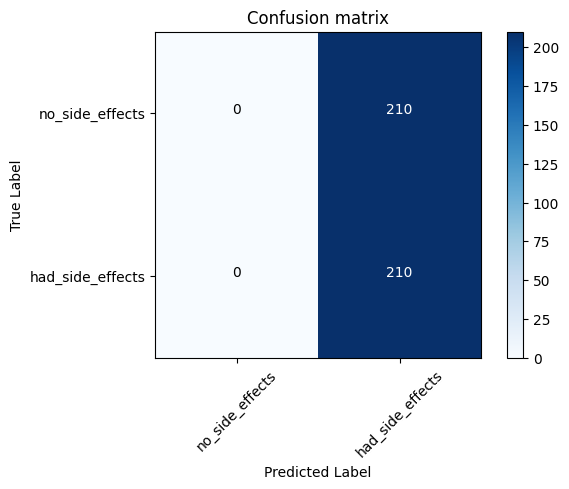

In [24]:
cm_plot_labels = ["no_side_effects","had_side_effects"]
plot_confusion_matrix(cm,cm_plot_labels)

In [25]:
## Save and Load Model

In [27]:
import os,pickle

if os.path.isfile("model/modelh5") is False:
    model.save("model/model.h5")

INFO:tensorflow:Assets written to: ram://116e72f3-25d6-40a4-a361-2da7bad074d5/assets


In [28]:
del model

In [29]:
model = keras.models.load_model("model/model.h5")

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_2 (Batc  (None, 16)               6

In [31]:
model.get_weights()

[array([[-0.0277071 ,  0.45936134, -0.02212983, -0.51705825, -0.43856055,
         -0.5680398 , -0.41166884, -0.09339571,  0.16192949,  0.01833492,
          0.54991   ,  0.4322093 , -0.10356209, -0.0551421 ,  0.5637933 ,
         -0.58667094]], dtype=float32),
 array([ 0.0000000e+00,  2.5714880e-06,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        -6.2812042e-06, -2.8477622e-05, -8.3848835e-07, -1.3535195e-06,
         0.0000000e+00,  0.0000000e+00,  1.4989823e-06,  0.0000000e+00],
       dtype=float32),
 array([1.        , 0.9914893 , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.0036691 , 0.99280757,
        1.007317  , 1.0059743 , 1.        , 1.        , 1.008593  ,
        1.        ], dtype=float32),
 array([-0.00393036, -0.00696017,  0.0068939 , -0.00358353, -0.00344734,
        -0.00824667, -0.00521082,  0.00834122, -0.00768545, -0.00379014,
         0.00752641,  0.00545745, -0.00